In [1]:
from keras.datasets import cifar10
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [4]:
model = load_model('model100.h5')

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 13ms/step


In [5]:
incorrect_cats = np.where((predicted_classes != y_test[:, 0]) & (y_test[:, 0] == 3))[0]

print(incorrect_cats)

[  61   78   91  106  143  176  184  245  277  323  332  356  367  412
  418  426  438  456  565  573  637  641  669  676  688  739  792  811
  819  825  831  845  862  866  870  878  882  898  916  957 1050 1053
 1074 1088 1124 1129 1163 1181 1227 1247 1268 1334 1346 1353 1373 1395
 1442 1552 1593 1595 1605 1662 1779 1787 1813 1830 1871 1883 1887 1905
 1909 1933 1936 1981 1993 1996 2029 2034 2044 2046 2175 2233 2286 2300
 2350 2405 2444 2453 2506 2524 2526 2529 2585 2606 2617 2632 2661 2747
 2804 2822 2829 2831 2855 2940 3052 3084 3113 3180 3247 3343 3353 3354
 3463 3489 3513 3602 3607 3614 3654 3716 3779 3787 3799 3819 3867 3900
 3901 3906 3928 3956 3977 4012 4071 4077 4094 4097 4106 4107 4147 4190
 4210 4282 4307 4391 4404 4442 4485 4527 4537 4547 4581 4589 4605 4614
 4643 4682 4705 4718 4754 4826 4862 4938 4963 4965 4982 4996 5011 5086
 5191 5200 5206 5213 5218 5268 5290 5340 5387 5410 5433 5458 5506 5511
 5525 5530 5559 5560 5592 5620 5630 5632 5639 5655 5752 5817 5833 5835
 5856 

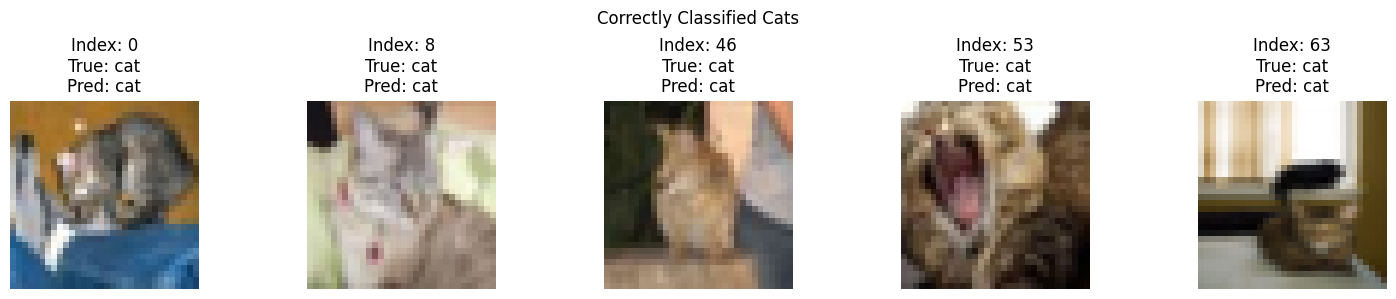

In [6]:
import matplotlib.pyplot as plt


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def plot_images(indices, images, true_labels, preds, title, class_names):
    plt.figure(figsize=(15, 3))
    for i, index in enumerate(indices[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[index])
        true_class_name = class_names[true_labels[index][0]]
        pred_class_name = class_names[preds[index]]
        plt.title(f"Index: {index}\nTrue: {true_class_name}\nPred: {pred_class_name}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

correct_cats = np.where((predicted_classes == y_test[:, 0]) & (y_test[:, 0] == 3))[0]
incorrect_cats = np.where((predicted_classes != y_test[:, 0]) & (y_test[:, 0] == 3))[0]

plot_images(correct_cats, x_test, y_test, predicted_classes, "Correctly Classified Cats", class_names)

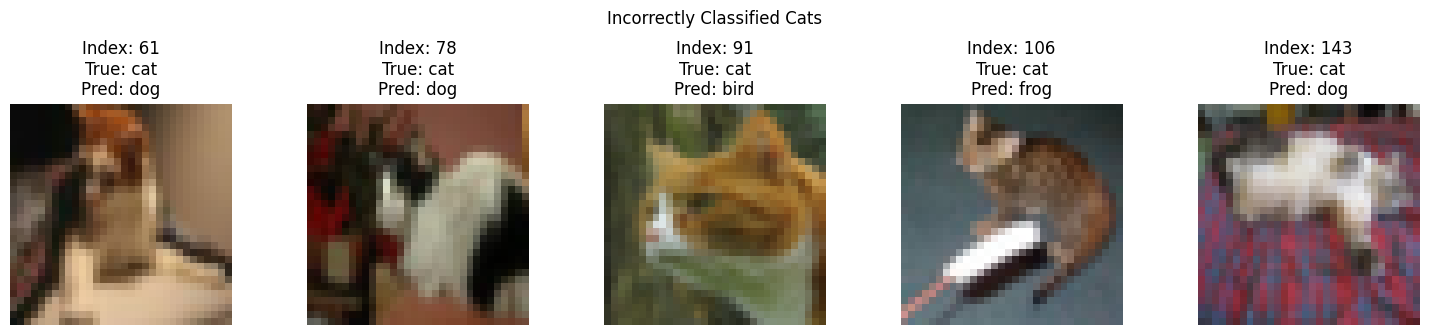

In [7]:
def plot_incorrect_cats(incorrect_indices, images, true_labels, preds, class_names):
    plt.figure(figsize=(15, 3))
    for i, index in enumerate(incorrect_indices[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[index])
        true_class = class_names[true_labels[index][0]]
        pred_class = class_names[preds[index]]
        plt.title(f"Index: {index}\nTrue: {true_class}\nPred: {pred_class}")
        plt.axis('off')
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout() 
    plt.suptitle("Incorrectly Classified Cats", y=1.1)
    plt.show()

plot_incorrect_cats(incorrect_cats, x_test, y_test, predicted_classes, class_names)